In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import basedosdados as bd

In [2]:
#Importações das tabelas
inep = bd.read_table(dataset_id='br_inep_indicadores_educacionais',
table_id='uf',
billing_project_id="teste-416402")

onu = bd.read_table(dataset_id='mundo_onu_adh',
table_id='uf',
billing_project_id="teste-416402")

ips = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips',
table_id='dimensoes_componentes',
billing_project_id="teste-416402")

Downloading: 100%|██████████| 99/99 [00:00<00:00, 281.61rows/s]


In [3]:
#Seleção apenas do ano de 2010 na tabela
onu2010 = onu[onu['ano'] == 2010]
#Verificação de dados da tabela
onu2010['idhm'].isnull().sum()

0

In [4]:
onu2010

,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
54,2010,AC,71.63,2.95,23.01,24.93,61.34,94.62,84.53,4.32,...,573909.0,87707.0,48412.0,437790.0,0.488,0.599,0.663,0.559,0.777,0.671
55,2010,AL,70.32,2.22,28.40,31.03,54.30,93.36,82.31,6.01,...,2547711.0,337867.0,194319.0,2015524.0,0.406,0.589,0.631,0.520,0.755,0.641
56,2010,AM,73.30,2.59,17.01,18.22,59.33,96.03,87.24,4.03,...,2728336.0,400697.0,227553.0,2100087.0,0.549,0.567,0.674,0.561,0.805,0.677
57,2010,AP,73.80,2.48,15.14,16.16,57.67,96.47,88.14,3.44,...,526975.0,79104.0,45288.0,402583.0,0.618,0.634,0.708,0.629,0.813,0.694
58,2010,BA,71.97,2.05,21.73,23.49,48.92,94.92,85.09,7.23,...,11764109.0,1339561.0,818228.0,9606320.0,0.461,0.609,0.660,0.555,0.783,0.663
59,2010,CE,72.60,1.99,19.29,20.76,50.32,95.50,86.20,7.54,...,7111302.0,847464.0,524991.0,5738848.0,0.488,0.691,0.682,0.615,0.793,0.651
60,2010,DF,77.35,1.75,14.01,15.85,40.14,94.57,86.19,4.97,...,2180903.0,219091.0,130872.0,1830940.0,0.723,0.751,0.824,0.742,0.873,0.863
61,2010,ES,75.10,1.80,14.15,16.33,43.26,92.57,82.28,7.08,...,3005851.0,302376.0,181921.0,2521554.0,0.552,0.711,0.740,0.653,0.835,0.743
62,2010,GO,74.60,1.87,13.96,16.28,43.41,93.33,82.69,6.25,...,5092674.0,531291.0,323865.0,4237518.0,0.550,0.700,0.735,0.646,0.827,0.742
63,2010,MA,70.40,2.56,28.03,30.61,58.65,93.45,82.45,6.02,...,5264736.0,725332.0,414954.0,4124450.0,0.444,0.632,0.639,0.562,0.757,0.612


In [5]:
#Verificação e tratamento da tabela
inep['taxa_abandono_em'].isnull().sum()
inep['taxa_abandono_em'].fillna(inep['taxa_abandono_em'].mean(), inplace=True)

In [6]:
#Separação apenas de um ano e média entre todas as informações de cada estado
inep_2010 = inep[inep['ano'] == 2010]
inep_2010_evasao = inep_2010.groupby('sigla_uf')['taxa_abandono_em'].mean()
inep_2010_evasaodf = pd.DataFrame({'sigla_uf': inep_2010_evasao.index, 'taxa_abandono_em': inep_2010_evasao.values})
inep_2010_evasaodf

,sigla_uf,taxa_abandono_em
0,AC,8.062168
1,AL,15.094013
2,AM,7.152629
3,AP,12.112979
4,BA,10.572222
5,CE,8.527679
6,DF,4.520000
7,ES,4.227778
8,GO,7.772222
9,MA,11.144444


In [7]:
#Junção das tabelas para análise
tabela_comparacao_em = pd.merge(onu2010, inep_2010_evasaodf, on='sigla_uf', how='inner')
tabela_comparacao_em

,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r,taxa_abandono_em
0,2010,AC,71.63,2.95,23.01,24.93,61.34,94.62,84.53,4.32,...,87707.0,48412.0,437790.0,0.488,0.599,0.663,0.559,0.777,0.671,8.062168
1,2010,AL,70.32,2.22,28.40,31.03,54.30,93.36,82.31,6.01,...,337867.0,194319.0,2015524.0,0.406,0.589,0.631,0.520,0.755,0.641,15.094013
2,2010,AM,73.30,2.59,17.01,18.22,59.33,96.03,87.24,4.03,...,400697.0,227553.0,2100087.0,0.549,0.567,0.674,0.561,0.805,0.677,7.152629
3,2010,AP,73.80,2.48,15.14,16.16,57.67,96.47,88.14,3.44,...,79104.0,45288.0,402583.0,0.618,0.634,0.708,0.629,0.813,0.694,12.112979
4,2010,BA,71.97,2.05,21.73,23.49,48.92,94.92,85.09,7.23,...,1339561.0,818228.0,9606320.0,0.461,0.609,0.660,0.555,0.783,0.663,10.572222
5,2010,CE,72.60,1.99,19.29,20.76,50.32,95.50,86.20,7.54,...,847464.0,524991.0,5738848.0,0.488,0.691,0.682,0.615,0.793,0.651,8.527679
6,2010,DF,77.35,1.75,14.01,15.85,40.14,94.57,86.19,4.97,...,219091.0,130872.0,1830940.0,0.723,0.751,0.824,0.742,0.873,0.863,4.520000
7,2010,ES,75.10,1.80,14.15,16.33,43.26,92.57,82.28,7.08,...,302376.0,181921.0,2521554.0,0.552,0.711,0.740,0.653,0.835,0.743,4.227778
8,2010,GO,74.60,1.87,13.96,16.28,43.41,93.33,82.69,6.25,...,531291.0,323865.0,4237518.0,0.550,0.700,0.735,0.646,0.827,0.742,7.772222
9,2010,MA,70.40,2.56,28.03,30.61,58.65,93.45,82.45,6.02,...,725332.0,414954.0,4124450.0,0.444,0.632,0.639,0.562,0.757,0.612,11.144444


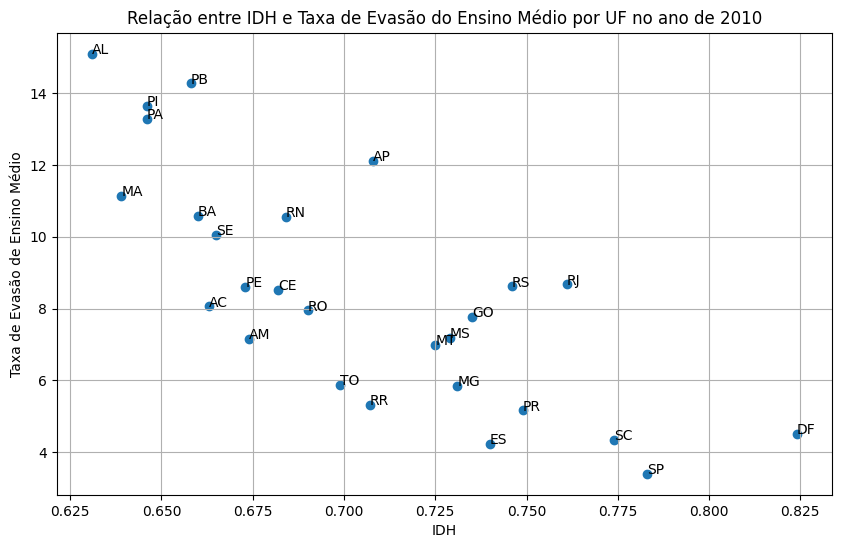

In [8]:
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_em['idhm'], tabela_comparacao_em['taxa_abandono_em'])
plt.title('Relação entre IDH e Taxa de Evasão do Ensino Médio por UF no ano de 2010')
plt.xlabel('IDH')
plt.ylabel('Taxa de Evasão de Ensino Médio')

for i, uf in enumerate(tabela_comparacao_em['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_em['idhm'][i], tabela_comparacao_em['taxa_abandono_em'][i]))

plt.grid(True)
plt.show()

In [9]:
#Verificação e trtamento da tabela
inep['taxa_abandono_ef'].isnull().sum()
inep['taxa_abandono_ef'].fillna(inep['taxa_abandono_ef'].mean(), inplace=True)

In [10]:
#Separação apenas de um ano e média entre todas as informações de cada estado
inep_2010_evasaoef = inep_2010.groupby('sigla_uf')['taxa_abandono_ef'].mean()
inep_2010_evasaoefdf = pd.DataFrame({'sigla_uf': inep_2010_evasaoef.index, 'taxa_abandono_ef': inep_2010_evasaoef.values})
inep_2010_evasaoefdf

,sigla_uf,taxa_abandono_ef
0,AC,3.843750
1,AL,7.586667
2,AM,5.205882
3,AP,2.926667
4,BA,5.329412
5,CE,2.664706
6,DF,0.864286
7,ES,1.686667
8,GO,2.941176
9,MA,3.227778


In [11]:
#Junção das tabelas para análise
tabela_comparacao_ef = pd.merge(onu2010, inep_2010_evasaoefdf, on='sigla_uf', how='inner')
tabela_comparacao_ef

,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r,taxa_abandono_ef
0,2010,AC,71.63,2.95,23.01,24.93,61.34,94.62,84.53,4.32,...,87707.0,48412.0,437790.0,0.488,0.599,0.663,0.559,0.777,0.671,3.843750
1,2010,AL,70.32,2.22,28.40,31.03,54.30,93.36,82.31,6.01,...,337867.0,194319.0,2015524.0,0.406,0.589,0.631,0.520,0.755,0.641,7.586667
2,2010,AM,73.30,2.59,17.01,18.22,59.33,96.03,87.24,4.03,...,400697.0,227553.0,2100087.0,0.549,0.567,0.674,0.561,0.805,0.677,5.205882
3,2010,AP,73.80,2.48,15.14,16.16,57.67,96.47,88.14,3.44,...,79104.0,45288.0,402583.0,0.618,0.634,0.708,0.629,0.813,0.694,2.926667
4,2010,BA,71.97,2.05,21.73,23.49,48.92,94.92,85.09,7.23,...,1339561.0,818228.0,9606320.0,0.461,0.609,0.660,0.555,0.783,0.663,5.329412
5,2010,CE,72.60,1.99,19.29,20.76,50.32,95.50,86.20,7.54,...,847464.0,524991.0,5738848.0,0.488,0.691,0.682,0.615,0.793,0.651,2.664706
6,2010,DF,77.35,1.75,14.01,15.85,40.14,94.57,86.19,4.97,...,219091.0,130872.0,1830940.0,0.723,0.751,0.824,0.742,0.873,0.863,0.864286
7,2010,ES,75.10,1.80,14.15,16.33,43.26,92.57,82.28,7.08,...,302376.0,181921.0,2521554.0,0.552,0.711,0.740,0.653,0.835,0.743,1.686667
8,2010,GO,74.60,1.87,13.96,16.28,43.41,93.33,82.69,6.25,...,531291.0,323865.0,4237518.0,0.550,0.700,0.735,0.646,0.827,0.742,2.941176
9,2010,MA,70.40,2.56,28.03,30.61,58.65,93.45,82.45,6.02,...,725332.0,414954.0,4124450.0,0.444,0.632,0.639,0.562,0.757,0.612,3.227778


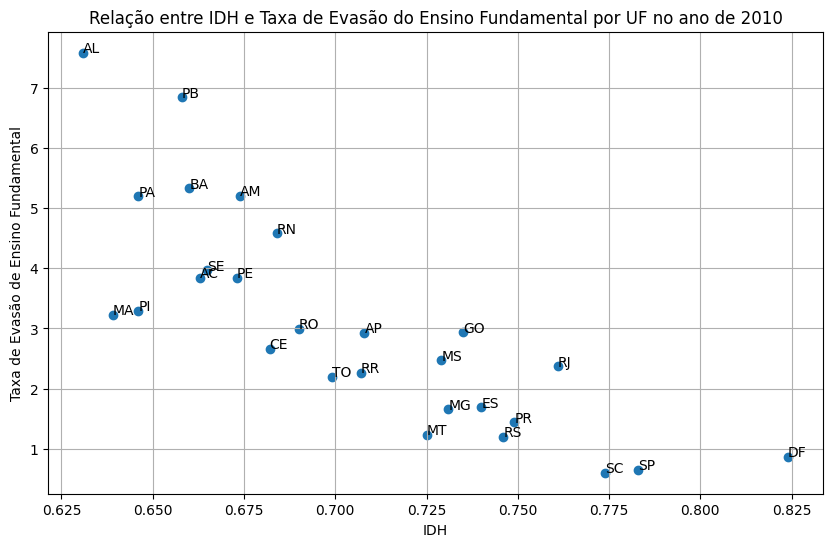

In [12]:
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_ef['idhm'], tabela_comparacao_ef['taxa_abandono_ef'])
plt.title('Relação entre IDH e Taxa de Evasão do Ensino Fundamental por UF no ano de 2010')
plt.xlabel('IDH')
plt.ylabel('Taxa de Evasão de Ensino Fundamental')

for i, uf in enumerate(tabela_comparacao_ef['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_ef['idhm'][i], tabela_comparacao_ef['taxa_abandono_ef'][i]))

plt.grid(True)
plt.show()

In [13]:
#Verificação da tabela
ips['acesso_educacao_superior'].isnull().sum()
ips['moradia'].isnull().sum()

0

In [14]:
#Separação por ano desejado
ips2020 = ips[ips['ano'] == 2020].reset_index(drop=True)
ips2020

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2020,Rio De Janeiro,60.79,74.13,66.12,83.68,79.57,67.14,51.63,66.19,50.89,53.08,36.37,56.62,54.33,62.72,77.05,32.36
1,2020,Portuaria,42.06,59.67,64.32,80.80,71.06,22.49,36.00,59.51,20.73,19.20,44.55,30.52,25.66,50.76,40.23,5.43
2,2020,Centro,55.59,59.23,56.64,74.18,91.60,14.52,50.26,61.97,56.00,37.26,45.82,57.26,41.68,87.28,51.84,48.26
3,2020,Rio Comprido,55.50,68.27,72.61,84.36,73.29,42.82,50.81,68.72,42.08,39.33,53.10,47.42,37.76,60.82,68.64,22.48
4,2020,Botafogo,85.03,91.66,89.92,98.49,99.07,79.18,77.09,80.70,86.52,78.58,62.56,86.32,56.63,89.80,99.48,99.39
5,2020,Copacabana,80.23,92.03,92.01,99.32,96.84,79.97,68.93,77.01,81.95,72.40,44.36,79.73,56.72,80.14,98.53,83.53
6,2020,Lagoa,79.02,85.05,67.40,98.86,96.28,77.66,70.24,69.58,89.06,75.07,47.23,81.76,50.12,96.77,98.57,81.59
7,2020,São Cristovão,51.86,69.14,65.35,86.36,74.47,50.36,40.80,66.57,34.65,31.01,30.98,45.63,50.37,52.92,62.40,16.83
8,2020,Tijuca,71.61,85.47,85.23,84.62,95.54,76.49,51.37,58.84,80.32,18.84,47.48,78.00,51.76,85.53,95.88,78.82
9,2020,Vila Isabel,73.05,82.68,68.21,94.21,87.11,81.17,64.52,62.50,74.99,65.02,55.58,71.95,57.34,65.11,92.14,73.20


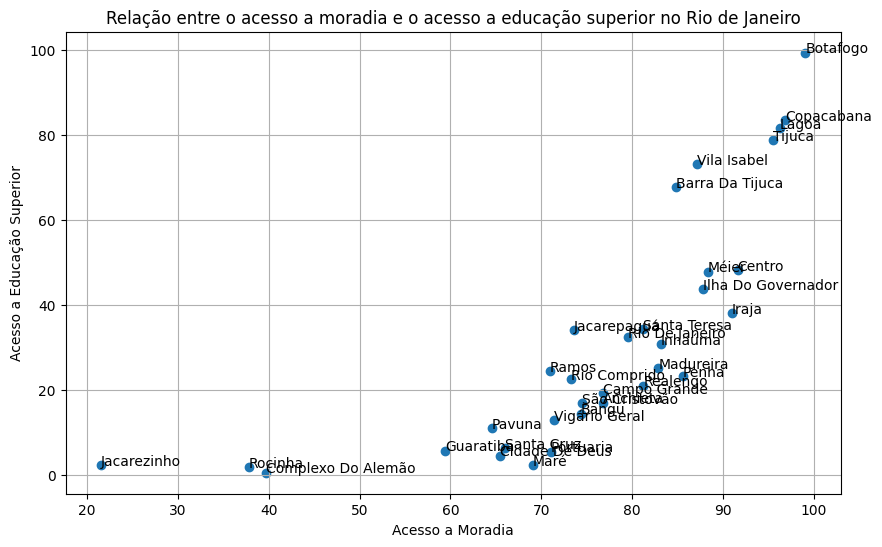

In [15]:
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(ips2020['moradia'], ips2020['acesso_educacao_superior'])
plt.title('Relação entre o acesso a moradia e o acesso a educação superior no Rio de Janeiro')
plt.xlabel('Acesso a Moradia')
plt.ylabel('Acesso a Educação Superior')

for i, regiao in enumerate(ips2020['regiao_administrativa']):
    plt.annotate(regiao, (ips2020['moradia'][i], ips2020['acesso_educacao_superior'][i]))

plt.grid(True)
plt.show()

In [16]:
#Verificação de dados
onu2010['renda_pc'].isnull().sum()

0

In [17]:
#Junção das tabelas para análise
tabela_comparacao_em = pd.merge(onu2010, inep_2010_evasaodf, on='sigla_uf', how='inner')
tabela_comparacao_ef = pd.merge(onu2010, inep_2010_evasaoefdf, on='sigla_uf', how='inner')

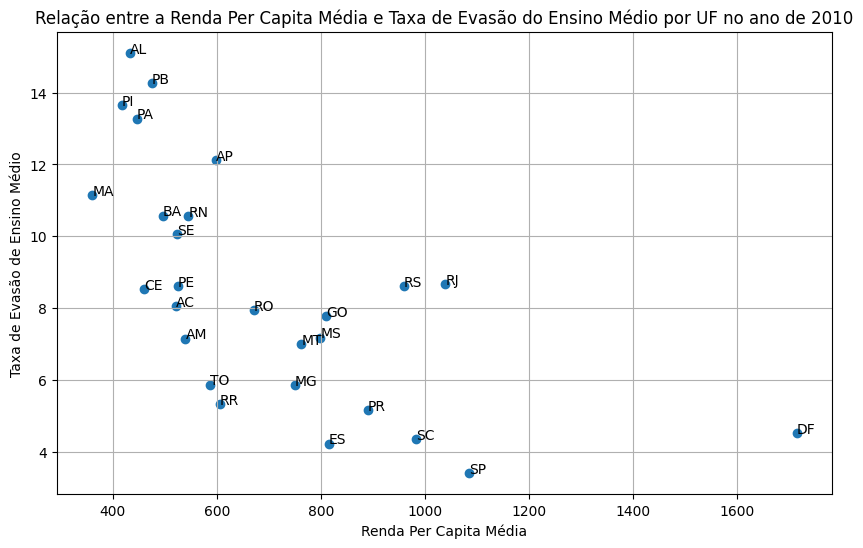

In [18]:
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_em['renda_pc'], tabela_comparacao_em['taxa_abandono_em'])
plt.title('Relação entre a Renda Per Capita Média e Taxa de Evasão do Ensino Médio por UF no ano de 2010')
plt.xlabel('Renda Per Capita Média')
plt.ylabel('Taxa de Evasão de Ensino Médio')

for i, uf in enumerate(tabela_comparacao_em['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_em['renda_pc'][i], tabela_comparacao_em['taxa_abandono_em'][i]))

plt.grid(True)
plt.show()

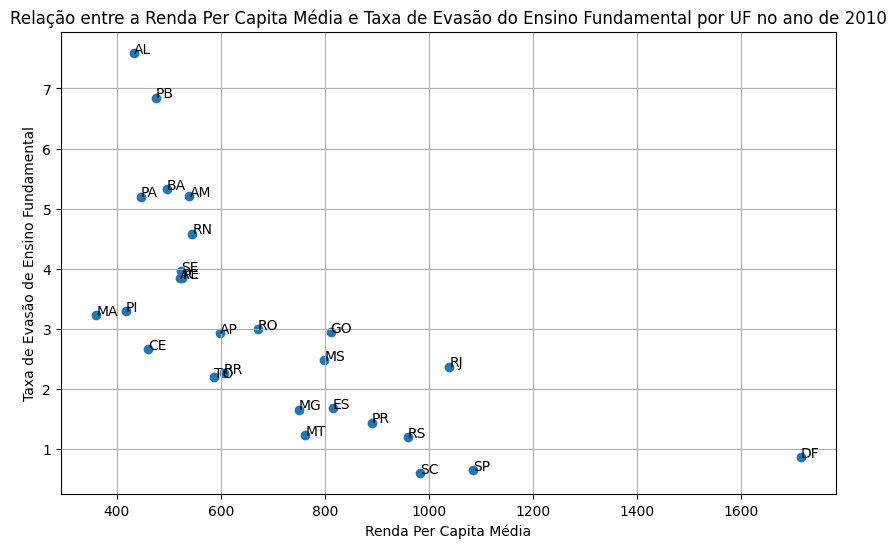

In [19]:
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_ef['renda_pc'], tabela_comparacao_ef['taxa_abandono_ef'])
plt.title('Relação entre a Renda Per Capita Média e Taxa de Evasão do Ensino Fundamental por UF no ano de 2010')
plt.xlabel('Renda Per Capita Média')
plt.ylabel('Taxa de Evasão de Ensino Fundamental')

for i, uf in enumerate(tabela_comparacao_ef['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_ef['renda_pc'][i], tabela_comparacao_ef['taxa_abandono_ef'][i]))

plt.grid(True)
plt.show()

In [20]:
#Verificação de dados da tabela
onu2010['taxa_desocupacao_15_17'].isnull().sum()

0

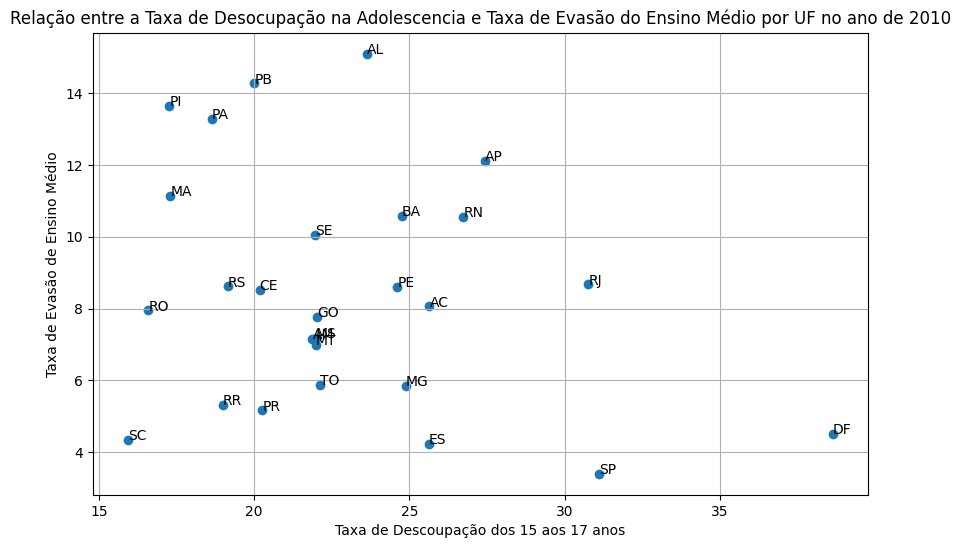

In [21]:
#Geração do gráfico desejado
tabela_comparacao_em = pd.merge(onu2010, inep_2010_evasaodf, on='sigla_uf', how='inner')
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_em['taxa_desocupacao_15_17'], tabela_comparacao_em['taxa_abandono_em'])
plt.title('Relação entre a Taxa de Desocupação na Adolescencia e Taxa de Evasão do Ensino Médio por UF no ano de 2010')
plt.xlabel('Taxa de Descoupação dos 15 aos 17 anos')
plt.ylabel('Taxa de Evasão de Ensino Médio')

for i, uf in enumerate(tabela_comparacao_em['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_em['taxa_desocupacao_15_17'][i], tabela_comparacao_em['taxa_abandono_em'][i]))

plt.grid(True)
plt.show()

In [22]:
#Verificação de dados da tabela
onu2010['razao_dependencia'].isnull().sum()

0

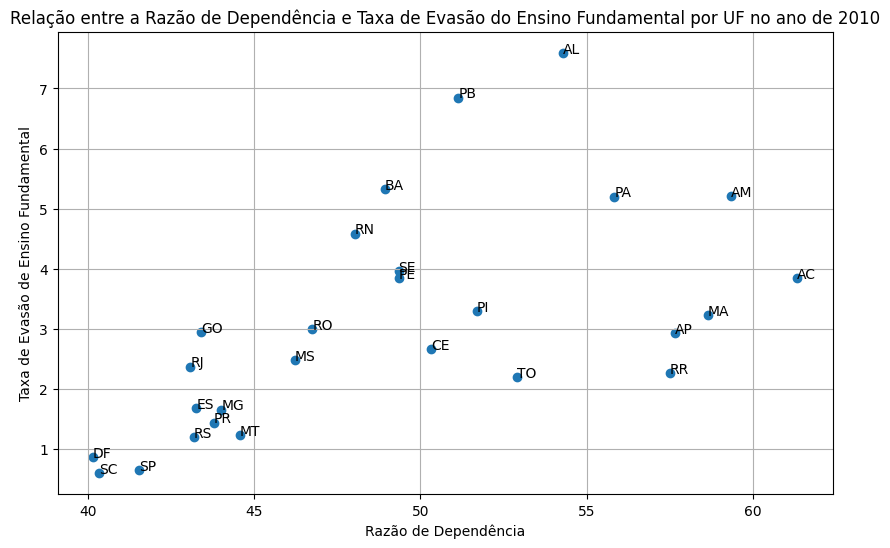

In [23]:
#Junção das tabelas pra análise
tabela_comparacao_ef = pd.merge(onu2010, inep_2010_evasaoefdf, on='sigla_uf', how='inner')
#Geração do gráfico desejado
plt.figure(figsize=(10, 6))

plt.scatter(tabela_comparacao_ef['razao_dependencia'], tabela_comparacao_ef['taxa_abandono_ef'])
plt.title('Relação entre a Razão de Dependência e Taxa de Evasão do Ensino Fundamental por UF no ano de 2010')
plt.xlabel('Razão de Dependência')
plt.ylabel('Taxa de Evasão de Ensino Fundamental')

for i, uf in enumerate(tabela_comparacao_ef['sigla_uf']):
    plt.annotate(uf, (tabela_comparacao_ef['razao_dependencia'][i], tabela_comparacao_ef['taxa_abandono_ef'][i]))

plt.grid(True)
plt.show()